In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns

sns.set(rc={'figure.figsize':(6,4)})

In [2]:
confirmed = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv")
deaths = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv")
recovered = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv")

In [3]:
confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,50,53,59,70,75,82,114,147,177,212
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,511,581,639,639,701,773,839,825,878,889
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,150,160,178,178,200,212,226,243,266,313
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,117,129,149,149,197,238,428,566,673,790


In [4]:
deaths.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20
0,NaN,Thailand,15.0000,101.0000,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
1,NaN,Japan,36.0000,138.0000,0,0,0,0,0,0,...,6,10,10,15,16,19,22,22,27,29
2,NaN,Singapore,1.2833,103.8333,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,Nepal,28.1667,84.2500,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Malaysia,2.5000,112.5000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


In [4]:
recovered.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20
0,NaN,Thailand,15.0000,101.0000,0,0,0,0,2,2,...,31,33,34,34,35,35,35,35,41,42
1,NaN,Japan,36.0000,138.0000,0,0,0,0,1,1,...,76,101,118,118,118,118,118,144,144,144
2,NaN,Singapore,1.2833,103.8333,0,0,0,0,0,0,...,78,78,96,96,97,105,105,109,114,114
3,NaN,Nepal,28.1667,84.2500,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,0,0,0,...,24,24,26,26,26,35,42,42,49,60


In [5]:
confirmed["Country/Region"].unique()

array(['Thailand', 'Japan', 'Singapore', 'Nepal', 'Malaysia', 'Canada',
       'Australia', 'Cambodia', 'Sri Lanka', 'Germany', 'Finland',
       'United Arab Emirates', 'Philippines', 'India', 'Italy', 'Sweden',
       'Spain', 'Belgium', 'Egypt', 'Lebanon', 'Iraq', 'Oman',
       'Afghanistan', 'Bahrain', 'Kuwait', 'Algeria', 'Croatia',
       'Switzerland', 'Austria', 'Israel', 'Pakistan', 'Brazil',
       'Georgia', 'Greece', 'North Macedonia', 'Norway', 'Romania',
       'Estonia', 'San Marino', 'Belarus', 'Iceland', 'Lithuania',
       'Mexico', 'New Zealand', 'Nigeria', 'Ireland', 'Luxembourg',
       'Monaco', 'Qatar', 'Ecuador', 'Azerbaijan', 'Armenia',
       'Dominican Republic', 'Indonesia', 'Portugal', 'Andorra', 'Latvia',
       'Morocco', 'Saudi Arabia', 'Senegal', 'Argentina', 'Chile',
       'Jordan', 'Ukraine', 'Hungary', 'Liechtenstein', 'Poland',
       'Tunisia', 'Bosnia and Herzegovina', 'Slovenia', 'South Africa',
       'Bhutan', 'Cameroon', 'Colombia', 'Costa R

In [7]:
# create a time series data
def prepare_data(case):
    """
    case:
        pandas data frame for either confirmed/deaths/recovered
    """
    # select only the columns with time
    case_T = case[case.columns[-54:]].T 

     # set columns names to Country/Region
    case_T.columns = case["Country/Region"]

    # transform index to datetime
    case_T.index = pd.to_datetime(case_T.index) 

    # sum data of regions in the same country
    regions_count = pd.value_counts(confirmed["Country/Region"]).reset_index()
    regions_count.columns = ["Country/Region","Counts"]
    to_drop = list(regions_count[regions_count["Counts"]>1]["Country/Region"].values)
    case_T_copy = case_T.copy()
    case_T_copy = case_T_copy.drop(to_drop, axis=1)
    for i in to_drop:
        case_T_copy[i] = case_T[i].sum(axis=1)
    
    return case_T_copy

In [9]:
confirmed_prepared = prepare_data(confirmed)
deaths_prepared = prepare_data(deaths)
recovered_prepared = prepare_data(recovered)

In [25]:
confirmed_prepared.tail(1)

Country/Region,Thailand,Japan,Singapore,Nepal,Malaysia,Cambodia,Sri Lanka,Germany,Finland,United Arab Emirates,...,Djibouti,"Gambia, The",US,China,Canada,Australia,France,United Kingdom,Netherlands,Denmark
2020-03-18,212,889,313,1,790,35,51,12327,336,113,...,1,1,7783,81102,657,568,9105,2642,2058,1115


In [32]:
sum_confirmed  = confirmed_prepared.tail(1).sum(axis=1)
sum_deaths  = deaths_prepared.tail(1).sum(axis=1)
sum_recovered  = recovered_prepared.tail(1).sum(axis=1)
print(sum_confirmed[0]), print(sum_deaths), print(sum_recovered)

214910
2020-03-18    8733
dtype: int64
2020-03-18    83207
dtype: int64


(None, None, None)

In [9]:
#  filter data by country
def filter_by_country(country):
    country_all  = pd.DataFrame(
        data=
            confirmed_prepared[country].values,
        columns = [
            "Confirmed",
        ],
        index=confirmed_prepared.index
    )

    country_all["Deaths"] = deaths_prepared[country].values
    country_all["Recovered"] = recovered_prepared[country].values
    country_all.index = pd.to_datetime(country_all.index)

    return country_all

In [10]:
# plotting a trend of cases
def plot_cases(country):
    country_cases = filter_by_country(country)

    # number of cases
    confirmed = country_cases["Confirmed"].values[-1]
    deaths = country_cases["Deaths"].values[-1]
    recovered = country_cases["Recovered"].values[-1]
    print("Confirmed: ", confirmed)
    print("Deaths: ", deaths)
    print("Recovered: ", recovered)
    print("Death Rate: {}".format(np.round((deaths/confirmed)*100, 1)))
    print("Recovery Rate: {}".format(np.round((recovered/confirmed)*100, 1)))
    country_cases.plot(
        title="Covid-19 Cases for {}".format(country),
        )
    plt.ylabel("# of cases")
    plt.show()
    return 

Confirmed:  24
Deaths:  0
Recovered:  0
Death Rate: 0.0
Recovery Rate: 0.0


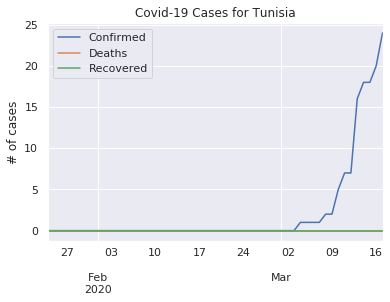

In [12]:
plot_cases("Tunisia")

Confirmed:  6421
Deaths:  108
Recovered:  17
Death Rate: 1.7
Recovery Rate: 0.3


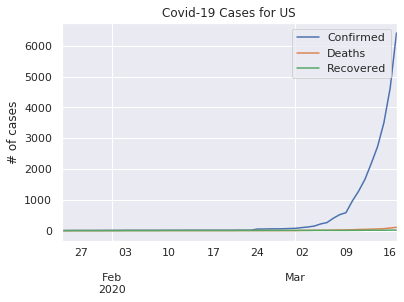

In [13]:
plot_cases("US")
